#Linear Algebra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

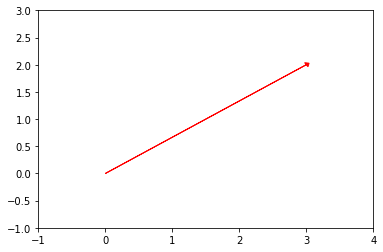

In [2]:
a = [3,2]
plt.arrow(0,0,a[0],a[1],head_width=0.09,head_length=0.05,color='red')
plt.xlim(-1,4)
plt.ylim(-1,3)
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [3]:
b = [17,-4,-2,1]
print('The norm of B => {}'.format(np.linalg.norm(b)))
print('The norm represents the length of the vector.')

The norm of B => 17.60681686165901
The norm represents the length of the vector.


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [24]:
c = [3,7,-2,12]
d = [9,-7,4,6]

cd_dot = np.dot(c,d)
print('Dot Product of c and d => {}'.format(cd_dot))

Dot Product of c and d => 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [5]:
E = np.mat('7 4 2; 1 3 -1; 2 6 -4')
Ei = E.I
ET = E.T
print('Inverse E => {}'.format(Ei))
print('Transposed E => {}'.format(ET))

Inverse E => [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
Transposed E => [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [6]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [7]:
##### Your Code Here #####
customers_mean = np.mean(df['customers'])
customers_std = np.std(df['customers'])
customers_var = np.var(df['customers'])
snow_mean = np.mean(df['snow'])
snow_std = np.std(df['snow'])
snow_var = np.var(df['snow'])
print('---Customers---')
print('mean : {}'.format(customers_mean))
print('std : {}'.format(customers_std))
print('var : {}'.format(customers_var))
print('---Snow---')
print('mean : {}'.format(snow_mean))
print('std : {}'.format(snow_std))
print('var : {}'.format(snow_var))

---Customers---
mean : 1135.7142857142858
std : 290.95199127087926
var : 84653.06122448981
---Snow---
mean : 2.7142857142857144
std : 2.7105237087157534
var : 7.346938775510203


In [8]:
## df.describe describes sample std/var
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

## No
Comparing the two variances, you can see that the spread for customers is exponentially larger than the spread for snow. Pretty sure we're supposed to use standard deviation.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [9]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [10]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [11]:
##### Your Code Here #####
df_copy = df.copy()
df_copy = df_copy.drop('Country',axis=1)

In [12]:
df_ss = StandardScaler().fit_transform(df_copy)
df_ss = pd.DataFrame(df_ss)
df_ss.head()

/Users/chrislouie/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/chrislouie/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [13]:
df_ss.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000e+00,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000e+00
mean,0.000000,0.000000,0.000000,0.000000,6.938894e-18,-5.551115e-17,0.000000,5.551115e-17,0.000000,0.000000,-5.551115e-17,0.000000,6.938894e-18,-5.551115e-17,-2.775558e-17,0.000000,5.551115e-17
std,1.154701,1.154701,1.154701,1.154701,1.154701e+00,1.154701e+00,1.154701,1.154701e+00,1.154701,1.154701,1.154701e+00,1.154701,1.154701e+00,1.154701e+00,1.154701e+00,1.154701,1.154701e+00
min,-1.729885,-1.277169,-1.483121,-1.464967,-1.097071e+00,-1.137656e+00,-1.335847,-1.247006e+00,-1.283054,-1.260994,-1.098378e+00,-1.609137,-8.555755e-01,-1.090266e+00,-1.404236e+00,-1.663384,-1.576656e+00
25%,-0.030617,-0.489873,-0.565440,-0.615286,-7.485897e-01,-6.900536e-01,-0.671519,-8.441271e-01,-0.693036,-0.567447,-9.336213e-01,-0.445460,-6.971356e-01,-6.230090e-01,-6.774824e-01,-0.337098,-4.978915e-01
50%,0.535805,-0.122468,0.142132,0.156263,-2.194142e-01,-2.051511e-01,-0.007190,7.673883e-02,-0.059314,-0.126099,-3.661260e-02,0.339920,-4.119437e-01,-2.595871e-01,1.067548e-01,0.410780,3.042670e-01
75%,0.566422,0.367405,0.707572,0.771549,5.291754e-01,4.849025e-01,0.664329,9.208660e-01,0.633722,0.441348,8.970087e-01,0.785380,2.851918e-01,3.634219e-01,7.842372e-01,0.747878,8.021585e-01
max,0.658275,1.522105,1.198856,1.152440,1.535899e+00,1.547958e+00,1.350227,1.093528e+00,1.401682,1.513193,1.171603e+00,0.929297,1.679463e+00,1.609440e+00,1.190727e+00,0.841823,9.681224e-01


## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [14]:
##### Your Code Here #####
#well if we only need to look at 2 PCs that saves a lot of trouble
pca = PCA(n_components=2)
PCs = pca.fit_transform(df_ss)
df_PC = pd.DataFrame(data=PCs, columns=['pc1','pc2'])
df_PC.head()

,pc1,pc2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


In [15]:
df_PC = pd.concat([df_PC, df['Country']],axis=1)
df_PC

,pc1,pc2,Country
0,-0.954490,0.328318,England
1,-4.520951,-1.735380,Wales
2,0.487978,3.233672,Scotland
3,4.987462,-1.826611,North Ireland


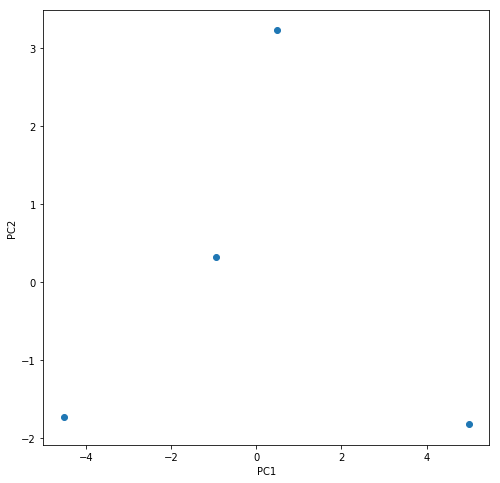

In [16]:
fig,ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.scatter(df_PC['pc1'],df_PC['pc2']);

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [17]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [18]:
##### Your Code Here #####
points.describe()

,x,y
count,200.000000,200.000000
mean,-2.323298,-3.422869
std,4.556513,5.580888
min,-10.118473,-11.095795
25%,-4.619520,-8.246848
50%,-3.373794,-5.307697
75%,-0.427175,3.360028
max,7.807885,5.883054


In [19]:
points_ss = StandardScaler().fit_transform(points)
points_ss = pd.DataFrame(points_ss,columns=['x','y'])
points_ss.head()

,x,y
0,-1.215264,0.000286
1,-0.270846,-0.621863
2,0.468740,-1.122373
3,-0.897263,-0.323537
4,0.334265,-1.128378


In [20]:
pca = PCA(n_components=2)
PCs = pca.fit_transform(points_ss)
df_PC = pd.DataFrame(data = PCs, columns=['pc1','pc2'])
df_PC.head()

,pc1,pc2
0,-0.859119,-0.859524
1,-0.631241,0.248206
2,-0.462188,1.125087
3,-0.863236,-0.405686
4,-0.561522,1.034245


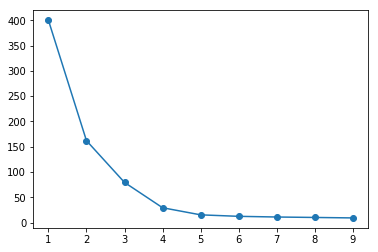

In [21]:
sum_of_squared_distances = []
K = range(1,10)
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(df_PC)
    sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances, 'o-')
plt.show()

In [22]:
#4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_PC)
kmeans_pca = kmeans.predict(df_PC)
df_PC['clusters'] = kmeans.labels_

df_PC.head()

,pc1,pc2,clusters
0,-0.859119,-0.859524,1
1,-0.631241,0.248206,3
2,-0.462188,1.125087,3
3,-0.863236,-0.405686,1
4,-0.561522,1.034245,3


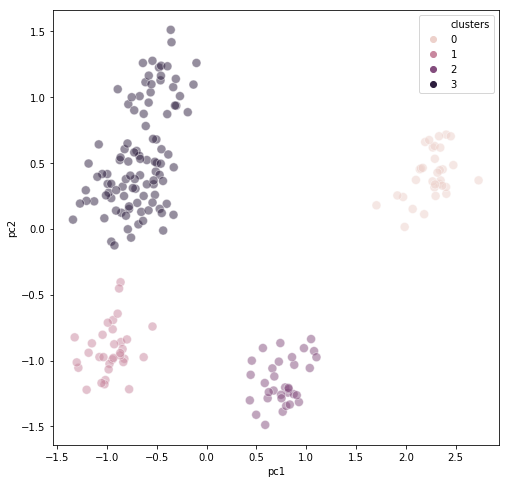

In [23]:
fig, ax = plt.subplots(figsize=(8,8))
#okay i tried coding this in matplotlib but i deleted it because
#seaborn is bae

sns.scatterplot(ax=ax, x='pc1',y='pc2',data=df_PC,hue='clusters',alpha=0.5,s=80,legend='full')
plt.show();